# Assessment Problems

## Imports

In [1]:
# Date and time handling
import datetime as dt

# Data manipulation
import pandas as pd

# Yahoo Finance data
import yfinance as yf

# Plotting
import matplotlib.pyplot as plt

# Date formatting for plots
import matplotlib.dates as mdates

# Listing files in a folder
import os

## Problem 1: Data from yfinance

This notebook relies on market data obtained through the `yfinance` library (see the [project homepage](https://github.com/ranaroussi/yfinance)), which is on open-source tool that allows us to fetch and download financial data from Yahoo Finance. 

In [2]:
# Fetch stocks tickers for analysis
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

# Display tickers
tickers

yfinance.Tickers object <META,AAPL,AMZN,NFLX,GOOG>

### Configure filename

To create a descriptive filename, we need to obtain today's date. We will use `now()` classmethod within `datetime` module (see the [official documentation](https://docs.python.org/3/library/datetime.html#datetime.datetime)). `now()` allows to get current local date and time. 

In [3]:
# Get today's date 
now = dt.datetime.now()

# Display today's date
now

datetime.datetime(2025, 12, 7, 10, 26, 15, 964057)

To format the date and time for use in filenames, we apply the `strftime()` method. Refer to the Python [official format code documentation](https://docs.python.org/3/library/datetime.html#format-codes) for the complete list of options.

To configure a filename as `YYYYMMDD-HHmmss.csv`, we can combine the four-digit year, month, and day directives with a dash, followed by zero-padded hour, minute and second directives.

In [4]:
# Format date and time
now.strftime("%Y%m%d-%H%M%S")

'20251207-102615'

Setting the filename involves three steps:
1. **Specify the folder path**. Since the `data` folder is in the same directory as this notebook, we can refer to it directly by name. Therefore, the path to the folder is `data/`.
2. **Generate a timestamp**. Use `datetime.now()` and format it with `strftime()` to produce the `YYYYMMDD-HHmmss` pattern.
3. **Add the `.csv` extension**. This indicates the file format and makes it easily recognisable as a CSV file.

In [5]:
# Create a filename including path and formatted date-time
filename = 'data/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S') + '.csv'

# Display filename
filename

'data/20251207-102615.csv'

### Download data and create a DataFrame

We will use the `yf.download()` function (see the [official documentation](https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download)) to download market data for the last 5 days for the tickers META, AAPL, AMZN, NFLX, GOOG. The result is stored in a [Pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). 

In [6]:
# Create a dataframe and download historical data 
# Period specifies the total duration of data to fetch
# Interval specifies the frequency of data points
df = yf.download(('META AAPL AMZN NFLX GOOG'), period='5D', interval='1h', auto_adjust=False)

# Display the first 3 rows of the data
print(df.head(3))

[*********************100%***********************]  5 of 5 completed

Price                       Adj Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-01 14:30:00+00:00  278.142090  232.880005  317.010010  639.494995   
2025-12-01 15:30:00+00:00  277.920013  233.970001  316.815002  642.734985   
2025-12-01 16:30:00+00:00  279.770508  234.365005  317.825012  643.510010   

Price                                       Close                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-12-01 14:30:00+00:00  107.910004  278.142090  232.880005  317.010010   
2025-12-01 15:30:00+00:00  108.380096  277.920013  233.970001  316.815002   
2025-12-01 16:30:00+00:00  108.559998  279.770508  234.365005  317.825012   

Price                                              ...        Open  \
Tick

### Automate dowloading and saving data with a function

We can now combine the steps above into a single function that downloads hourly market data for the previous five days for the five FAANG stocks.

In [7]:
# Function to get data and save to CSV
def get_data():
    """Download data and save to CSV file."""
    # Get historical data for the last 5 days
    df = yf.download(('META AAPL AMZN NFLX GOOG'), period='5D', interval='1h',auto_adjust=False)
    # Create a filename with the current date and time
    filename = 'data/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S') + '.csv'
    # Save data to CSV
    df.to_csv(filename)
    # Return the dataframe
    return df

# Call the function to get data and save to CSV
faang_df = get_data()

[*********************100%***********************]  5 of 5 completed


## Problem 2 - Plotting Data

To visualize the data, we can use the plotting capabilities of `Matplotlib` and save the resulting figure with the `matplotlib.pyplot.savefig` method (see the [official documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)). The figure is stored in the project's `plots/` directory in `.png` format. The `dpi` parameter allows us to adjust image resolution, balancing clarity and file size.

For formatting the date labels on the x-axis, we use the `matplotlib.dates` module (see the [official documentation](https://matplotlib.org/stable/api/dates_api.html)). The approach for setting major and minor ticks was informed by the following [Stack Overflow](https://stackoverflow.com/questions/9627686/plotting-dates-on-the-x-axis) discussion. 

Additionally, the default legend placement overlapped with the plotted lines, so we reposition the legend outside the plot area, adapting solution from one of the examples provided within `Matplotlib` [Legend guide](https://matplotlib.org/stable/users/explain/axes/legend_guide.htmlhttps://matplotlib.org/stable/users/explain/axes/legend_guide.html). To prevent the legend from being clipped when saving, we apply a layout adjustment based on troubleshooting advice obtained via. [ChatGPT](https://chatgpt.com/share/69345361-18dc-8012-a1cf-a922d92b9830).

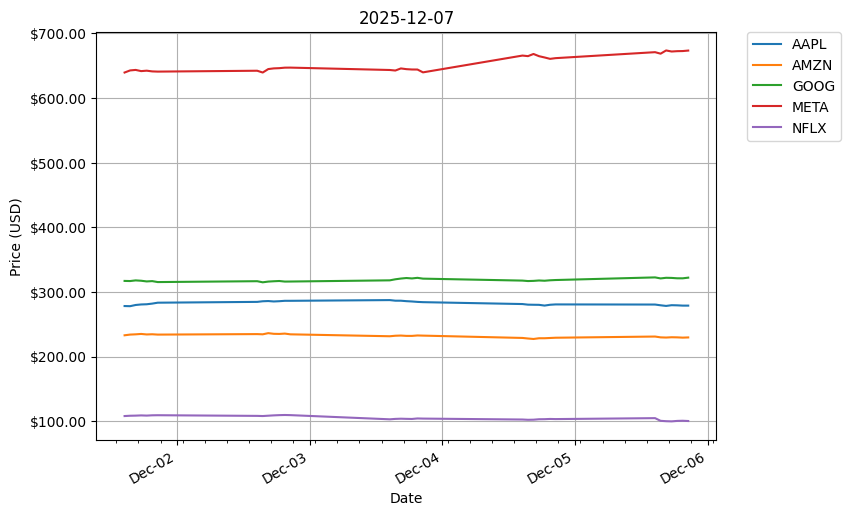

In [8]:
# Create figure / axis for customized plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot close prices passing the axis
df['Close'].plot(ax=ax)

# Get today's date for figure naming
now = dt.datetime.now()
# Set title as date
ax.set_title(now.strftime('%Y-%m-%d'))

# Set x axis label
ax.set_xlabel('Date')
# Set y axis label
ax.set_ylabel('Price (USD)')

# X-axis formatting
# Major ticks - days with labels
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
# Minor ticks: hourly markers without labels
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=4))

# Y-axis formatting
# https://matplotlib.org/stable/gallery/ticks/dollar_ticks.html
ax.yaxis.set_major_formatter('${x:1.2f}')

# Place legend outside the plot area
ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
# Add grid
ax.grid(True)

# Save the plot to a folder
# Create a figure name with the current date in .png format
figure_name =  'plots/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S') + '.png'
# The dpi parameter sets the resolution of the saved figure
#fig.savefig(figure_name, dpi = 300, bbox_inches='tight')

plt.show()

### Accessing `.csv` files in the `data` folder

Since `.png` files can be large, we only want to visualize the data from the most recent `.csv` file downloaded earlier. To do this, we first need to access the files stored in the `data` directory and sort them.

We can list the files in the directory using the `os.listdir()` method (see the [official documentation](https://docs.python.org/3/library/os.html)), which returns all files and folders in the specified path. [GeeksforGeeks guide](https://www.geeksforgeeks.org/python/python-os-listdir-method/) provides additional usage examples. 

In [9]:
# List files in the 'data' folder
data_files = os.listdir('data')

# Display the list of files
data_files

['20251206-154427.csv',
 '20251122-074415.csv',
 '20251122-145340.csv',
 '20251129-144550.csv',
 '20251121-091135.csv',
 '20251122-145825.csv',
 '20251116-212737.csv',
 '20251129-135852.csv',
 '20251206-181234.csv',
 '20251116-212751.csv',
 '20251206-094321.csv',
 '20251207-102616.csv',
 '20251122-154852.csv',
 '20251122-072955.csv',
 '20251129-135851.csv',
 '20251116-213617.csv',
 '20251117-085407.csv',
 '20251122-072330.csv',
 '20251206-191950.csv',
 '20251117-090600.csv',
 '20251117-085418.csv']

### Sort files
There are a few ways to sort file names, and here we will use the `list.sort()` method (see the [official documentation](https://docs.python.org/3/howto/sorting.html)). This method sorts the list in place. By setting the parameter `reverse=True`, we sort the list descending order, which places the most recent file at the beginning.

In [10]:
# Sort files by name in descending order
data_files.sort(reverse=True) 

# Display sorted list of files
data_files

['20251207-102616.csv',
 '20251206-191950.csv',
 '20251206-181234.csv',
 '20251206-154427.csv',
 '20251206-094321.csv',
 '20251129-144550.csv',
 '20251129-135852.csv',
 '20251129-135851.csv',
 '20251122-154852.csv',
 '20251122-145825.csv',
 '20251122-145340.csv',
 '20251122-074415.csv',
 '20251122-072955.csv',
 '20251122-072330.csv',
 '20251121-091135.csv',
 '20251117-090600.csv',
 '20251117-085418.csv',
 '20251117-085407.csv',
 '20251116-213617.csv',
 '20251116-212751.csv',
 '20251116-212737.csv']

### Get the latest file

In [11]:
# Pass index 0 to get the most recent file
data_files[0]

'20251207-102616.csv'

### Get `Close` prices

To extract the **Close** prices for all tickers from a CSV file, we use the `pd.read_csv()` function (see the [official documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)). Since the CSV uses a `MultiIndex` for column names (two rows) and includes a Datetime column, we need to handle both correctly.
 - **Header handling**: By passing `header[0,1]`, we read the first two rows to capture both the price type (e.g., Close) and the corresponding ticker.
 - **Datetime handling**: We set the datetime column as the index and parse it as dates using the `index_col` and `parse_dates` parameters. This ensures the DataFrame is properly indexed by time for further analysis.

In [12]:
# Read the most recent CSV file into a DataFrame
latest_df = pd.read_csv('data/' + data_files[0], header=[0,1], index_col=0, parse_dates=True) 

# Display the first 3 rows of the DataFrame
latest_df.head(3)

Price                       Adj Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-01 14:30:00+00:00  278.142090  232.880005  317.010010  639.494995   
2025-12-01 15:30:00+00:00  277.920013  233.970001  316.815002  642.734985   
2025-12-01 16:30:00+00:00  279.770508  234.365005  317.825012  643.510010   

Price                                       Close                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-12-01 14:30:00+00:00  107.910004  278.142090  232.880005  317.010010   
2025-12-01 15:30:00+00:00  108.380096  277.920013  233.970001  316.815002   
2025-12-01 16:30:00+00:00  108.559998  279.770508  234.365005  317.825012   

Price                                              ...        Open  \
Ticker                           META        NFLX  ...        AAPL   
Datetime                                           ...               
2025-12-01 14:30:00+00:00  639.494995  107.910004  ...  278.149994   
2025-12-01 15:30:00+00:00  642.734985  108.380096  ...  278.100006   
2025-12-01 16:30:00+00:00  643.510010  108.559998  ...  277.899994   

Price                                                                      \
Ticker                           AMZN        GOOG        META        NFLX   
Datetime                                                                    
2025-12-01 14:30:00+00:00  233.214996  317.269989  639.544983  106.500000   
2025-12-01 15:30:00+00:00  232.869995  316.980011  639.440002  107.904999   
2025-12-01 16:30:00+00:00  233.970001  316.904999  642.780029  108.400002   

Price                       Volume                                      
Ticker                        AAPL     AMZN     GOOG     META     NFLX  
Datetime                                                                
2025-12-01 14:30:00+00:00  5114373  7486323  5378317  2268278  3141668  
2025-12-01 15:30:00+00:00  1731132  3030989  1936805  1215559  1918590  
2025-12-01 16:30:00+00:00  2091919  2172750  1200955   522420  1236410  

[3 rows x 30 columns]

In [13]:
# Extract the 'Close' prices column
closing_price = latest_df['Close']

closing_price.head(3)

Ticker,AAPL,AMZN,GOOG,META,NFLX
Datetime,,,,,
2025-12-01 14:30:00+00:00,278.142090,232.880005,317.010010,639.494995,107.910004
2025-12-01 15:30:00+00:00,277.920013,233.970001,316.815002,642.734985,108.380096
2025-12-01 16:30:00+00:00,279.770508,234.365005,317.825012,643.510010,108.559998


### Automate plotting Close prices from the latest function with a function

Similarly to Problem 1, we can now combine the steps performed earlier into a single function to streamline the process.

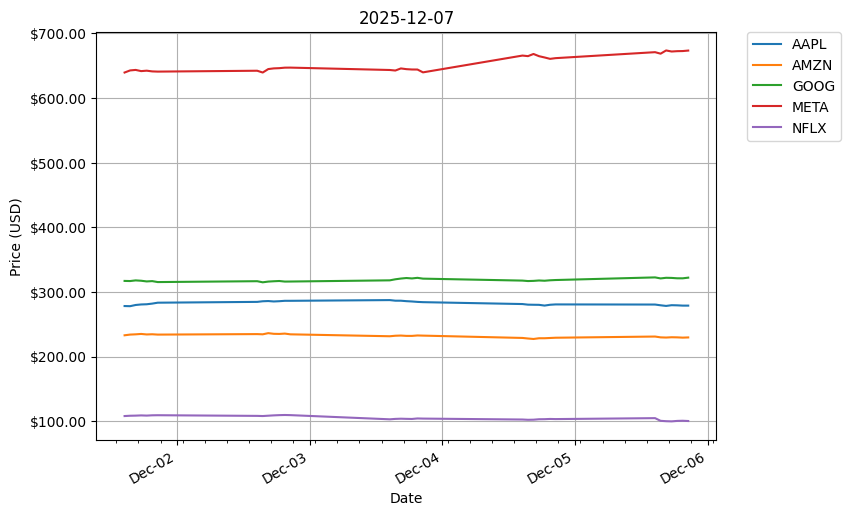

In [14]:
# Create function to plot data for the latest CSV file
def plot_data():
    """Plot the latest CSV file data."""

    # List files in the 'data' folder
    data_files = os.listdir('data')
    # Sort files by name in descending order
    data_files.sort(reverse=True) 
    
    # Read the most recent file
    latest_df = pd.read_csv('data/' + data_files[0], header=[0,1], index_col=0, parse_dates=True) 
    # Select Closing prices
    closing_price = latest_df['Close']
    
    # Plot close prices passing
    fig, ax = plt.subplots(figsize=(8, 6))
    closing_price.plot(ax=ax)

    # Set title as date using today's date
    now = dt.datetime.now()
    ax.set_title(now.strftime('%Y-%m-%d'))

    # Set X and Y axes labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Price (USD)')

    # X-axis formatting
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    # Minor ticks: hourly markers without labels
    ax.xaxis.set_minor_locator(mdates.HourLocator(interval=4))

    # Y-axis formatting
    ax.yaxis.set_major_formatter('${x:1.2f}')

    # Place legend outside the plot area
    ax.legend(bbox_to_anchor=(1.05, 1),
                            loc='upper left', borderaxespad=0.)
    # Add grid
    ax.grid(True)

    # Save the plot to a folder
    figure_name =  'plots/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S') + '.png'
    fig.savefig(figure_name, dpi = 300, bbox_inches='tight')
    
    return closing_price

# Call the function to get data and save to CSV
closing_price = plot_data()

## Problem 3: Script

As part of the Problem 3 requirements, a `faang.py` script has been created containing the two previously developed functions: `get_data()` and `plot_data()`. The goal is to make the script executable directly from the terminal by calling the script name. 

### Running the `faang.py` script from the terminal
To ensure a Python script can be executed, the operating system must (1) know how to run it and (2) allow it to run. We address these requirements as follows:

1. **Tell the system it's a Python script**: At the top of the script, we include a shebang line: `#!/usr/bin/env python3`. This informs the system that the file should be executed using Python.
2. **Run the script from the correct location**: To run the script we need to set a path. Since the script resides in the current working directory, we prefix the filename with **./**: `./faang.py`, where 
- `.` means “this directory”
- `./faang.py` means “run the file named faang.py here”.
3. **Check whether the script has execute permission**: We can check the file permissions using `ls -l`. The output might show: `-rw-rw-rw-`. The way to read it is: 
- **-** is regular file (not a directory)
- **r** is read permission
- **w** is write permission
- **x** is execute permission (missing here)
Permissions are grouped into user (first part), group (second part), and others (third part). 
4. **Add execute permission**: To make the script executable, we add execute permission for the **user** by running throug the terminal `chmod u+x faang.py`. In this command **u** stands for *user* and **x** stands for *execute*.Running `ls -l` again should show `-rwxrw-rw-`. 
5. **Run the script again**: Now the script can be executed by calling `./faang.py` in the terminal.

# End